In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-25 14:18:14.631810: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 14:18:14.672125: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 14:18:15.219941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/André - RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')
df_Pesc_olhuda_art = pd.DataFrame(df[['Ano','Pesc_olhuda_art']])

dados = df_Pesc_olhuda_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1965,1974,1993,1994,1997,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Pesc_olhuda_art'].values
dados.head()

,Ano,Pesc_olhuda_art
12,1962,426.974180
13,1963,492.856968
14,1964,647.899660
16,1966,169.222174
17,1967,389.343999


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [11]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=380, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Pesc_olhuda/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/380


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7870
Epoch 2/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8088 
Epoch 3/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0971 
Epoch 4/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0600 
Epoch 5/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9610 
Epoch 6/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6814 
Epoch 7/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8862 
Epoch 8/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8753 
Epoch 9/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6276 
Epoch 10/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6734 
Epoch 11/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8845 
Epoch 12/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9361 
Epoch 13/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6781 
Epoch 14/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6671 
Epoch 15/380
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6269 
Epoch 16/380
2/2 ━━━━━━━━━━━━━━━

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Pesc_olhuda/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[  30.635284]
 [  56.298553]
 [  81.94949 ]
 [ 107.59143 ]
 [ 133.23106 ]
 [ 158.6733  ]
 [ 182.98935 ]
 [ 206.0028  ]
 [ 230.06828 ]
 [ 253.54135 ]
 [ 277.19977 ]
 [ 301.75702 ]
 [ 384.84546 ]
 [3542.368   ]
 [ 231.57158 ]
 [ 197.55247 ]
 [ 140.49733 ]
 [ 188.40775 ]]


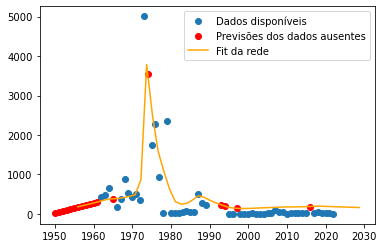

In [12]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

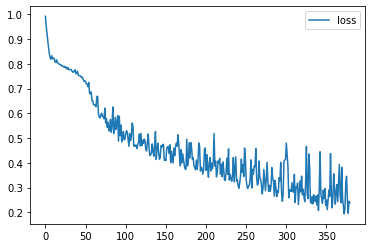

In [13]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [14]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Pesc_olhuda_art':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Pesc_olhuda/Interpolações e Extrapolações Pesc_olhuda_art.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Ano,Pesc_olhuda_art
0,1950,30.635284
1,1951,56.298553
2,1952,81.949493
3,1953,107.591431
4,1954,133.231064
...,...,...
62,2012,178.807144
63,2013,180.193970
64,2014,182.791824
65,2015,185.594131
